# M6 PROJECT: (Another one) Kaggle Competition

Student: Loai Siwas

Congratulations on making it to the end of the data science module!

The final assignment you will work on is going to be similar to the previous module assignment. You will combine a lot of the skills and knowledge you have built on throughout the modules and participate in a Kaggle competition.

You can select one of the following competitions: 
- Real or not? NLP with disaster tweets: https://www.kaggle.com/c/nlp-getting-started/overview.
- Help Intel classify images fro the natural world: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

Pick a competition and follow the instructions to make sure you understand the problem, data and submission requirements. Some competitions are closed but you can still submit and see how you are placed on the leader board. 

As you are building a predictive model or models, make sure you follow some of the best practices we have learned so far:

1. Give an explanation of the dataset and what it contains. In DS it's the little things in the untrained eyes that makes the most impacts. Explanations and plots not explained or not explained properly or serving not purpose will be penalised. 
1. Make sure compare a few models. No one gets it the right way from the first try.
1. Focus on good coding practices as long as a clear workflow. Being able to explain your workflow clearly is a big skill evaluated by employers.
1. Preserve some space for explainability. No one. like a black-box algorithm these days. 
1. Make sure to upload your project on GitHub, GH its a great way to show employers you have experience in building projects. A few things to remember:
    1. Make a nice and concrete README.md file
    1. Have a clear commit history
1. The submitted notebook should be written as it should be presented to some very important technical person in your company. It should be polished accordingly and omit unnecessary things.

To give you an idea of a good example project, check out this GitHub repo: https://github.com/melekaslan/DSMLBC/blob/master/7.Hafta/Diabetes%20Classification%20using%20Machine%20Learning.ipynbLinks to an external site.PPreserve some space for explaiAdd last e

Same project on Kaggle: https://www.kaggle.com/melekaslan/diabetes-classification-using-machine-learning/notebook

**You don't need to follow the exact same steps in the project you choose (and not all of them will be applicable) but this should give you a good idea of how an end-to-end executed solution could look like. See how it is easy to understand & follow, and nicely presented in a storyline.**

Submit your Jupyter notebook and link to a GitHub repository where you store the code, as well your Kaggle link. What is your position in the leader board?

Note that this is a team assessment! Please a form of max 3 people and inform me about the structure of the team! You will be graded as a team and the bigger the team, the more is expected!

Do not look at popular kernels with solutions on Kaggle, you should present your own original work. 

Good luck!

---

## 1. Selecting the competitions
I will select the "Natural Language Processing with Disaster Tweets" competition

The "Natural Language Processing with Disaster Tweets" competition on Kaggle was a popular challenge that focused on using natural language processing (NLP) techniques to analyze Twitter data related to disaster tweets. The goal of the competition was to build machine learning models that could accurately predict whether a given tweet was about a real disaster or not.

The dataset provided for the competition consisted of thousands of tweets, each labeled as either "real" or "fake" disaster-related tweets. Participants were required to preprocess the text data, engineer relevant features, and train predictive models using NLP techniques.

## 2. Importing the data and exploration

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# imporintg the data from the csv files
train_data = pd.read_csv('train.csv', index_col=0) # train data
test_data = pd.read_csv('test.csv', index_col=0) # test data

In [3]:
# printing the shape of the train and test data
print('There are {} rows and {} columns in train'.format(train_data.shape[0],train_data.shape[1]))
print('There are {} rows and {} columns in test'.format(test_data.shape[0],test_data.shape[1]))

There are 7613 rows and 4 columns in train
There are 3263 rows and 3 columns in test


In [4]:
# displaiyng the data
display(train_data.shape) # display the shape of the train data
display(train_data.head()) # display the head of the train data
display(test_data.shape) # display the shape of the test data
display(test_data.head()) # display the head of the test data

(7613, 4)

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


(3263, 3)

,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
# Print the train_data info 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


In [6]:
# print the dtype of each column
train_data.dtypes

keyword     object
location    object
text        object
target       int64
dtype: object

## 3. Preparing the data and cleaning

### 3.1 Handling Null Values

In [7]:
# Checking for null values in the training data
print(train_data.isnull().sum())

keyword       61
location    2533
text           0
target         0
dtype: int64


In [8]:
# Checking for null values in the training data
print(test_data.isnull().sum())

keyword       26
location    1105
text           0
dtype: int64


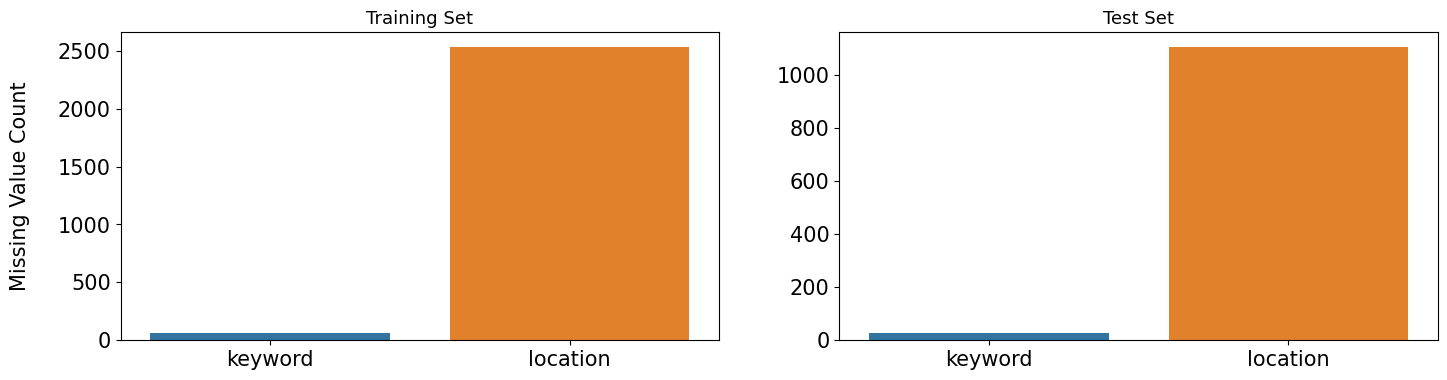

In [9]:
# plot missing values in training and test data
missing_cols = ['keyword', 'location'] # missing values in these columns

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100) # set figure size

sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[0]) # plot missing values in training data
sns.barplot(x=test_data[missing_cols].isnull().sum().index, y=test_data[missing_cols].isnull().sum().values, ax=axes[1]) # plot missing values in test data

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20) # set y label
axes[0].tick_params(axis='x', labelsize=15) # set x tick size
axes[0].tick_params(axis='y', labelsize=15) # set y tick size
axes[1].tick_params(axis='x', labelsize=15) # set x tick size
axes[1].tick_params(axis='y', labelsize=15) # set y tick size

axes[0].set_title('Training Set', fontsize=13) # set title
axes[1].set_title('Test Set', fontsize=13) # set title

plt.show() # show plot

In [10]:
# fill NaN values in keyword and location columns with 'no_keyword' and 'no_location' respectively
for df in [train_data, test_data]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

In [11]:
# Checking for null values in the training data
print(train_data.isnull().sum())

keyword     0
location    0
text        0
target      0
dtype: int64


In [12]:
# Checking for null values in the training data
print(test_data.isnull().sum())

keyword     0
location    0
text        0
dtype: int64


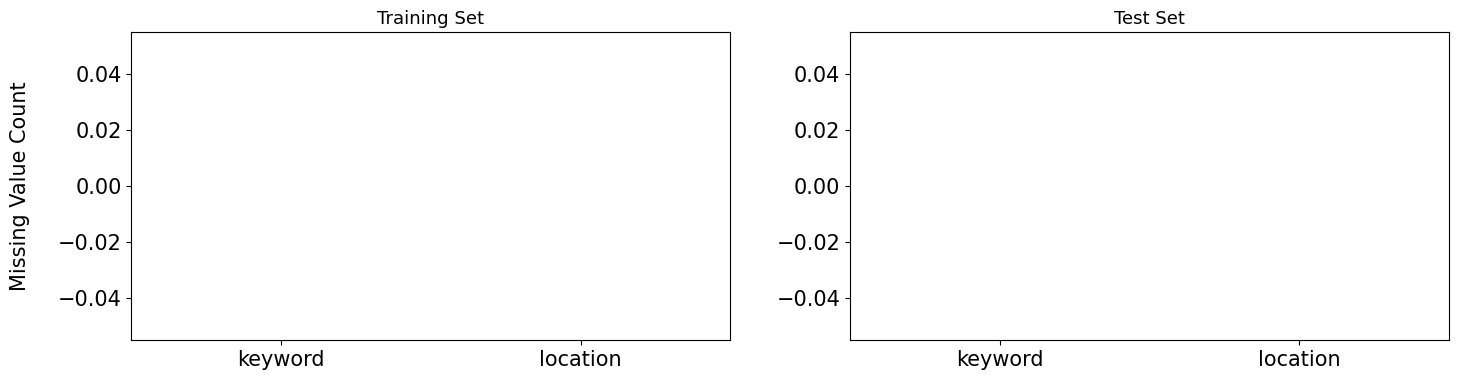

In [13]:
# plot missing values in training and test data
missing_cols = ['keyword', 'location'] # missing values in these columns

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100) # set figure size

sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[0]) # plot missing values in training data
sns.barplot(x=test_data[missing_cols].isnull().sum().index, y=test_data[missing_cols].isnull().sum().values, ax=axes[1]) # plot missing values in test data

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20) # set y label
axes[0].tick_params(axis='x', labelsize=15) # set x tick size
axes[0].tick_params(axis='y', labelsize=15) # set y tick size
axes[1].tick_params(axis='x', labelsize=15) # set x tick size
axes[1].tick_params(axis='y', labelsize=15) # set y tick size

axes[0].set_title('Training Set', fontsize=13) # set title
axes[1].set_title('Test Set', fontsize=13) # set title

plt.show() # show plot

In [14]:
# displaiyng the data
display(train_data.shape) # display the shape of the train data
display(train_data.head()) # display the head of the train data
display(test_data.shape) # display the shape of the test data
display(test_data.head()) # display the head of the test data

(7613, 4)

,keyword,location,text,target
id,,,,
1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1


(3263, 3)

,keyword,location,text
id,,,
0,no_keyword,no_location,Just happened a terrible car crash
2,no_keyword,no_location,"Heard about #earthquake is different cities, s..."
3,no_keyword,no_location,"there is a forest fire at spot pond, geese are..."
9,no_keyword,no_location,Apocalypse lighting. #Spokane #wildfires
11,no_keyword,no_location,Typhoon Soudelor kills 28 in China and Taiwan


### 3.2 Removing duplicate

In [15]:
# Removing duplicate rows
train_data.drop_duplicates(inplace=True)

### 3.3 Removing urls

In [16]:
# define function to remove url
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [17]:
df['text']=df['text'].apply(lambda x : remove_URL(x)) # apply function to remove URL

### 3.4 Removing HTML tags

In [18]:
# defining a function to remove html tags from the text
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [19]:
df['text']=df['text'].apply(lambda x : remove_html(x)) # apply function to remove html tags

### 3.4 Removing Emojis

In [20]:
# define a function to remove emojis from text
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [21]:
df['text']=df['text'].apply(lambda x: remove_emoji(x)) # apply function to remove emoji

## 4. EDA  

### 4.1. Target Class Distribution  

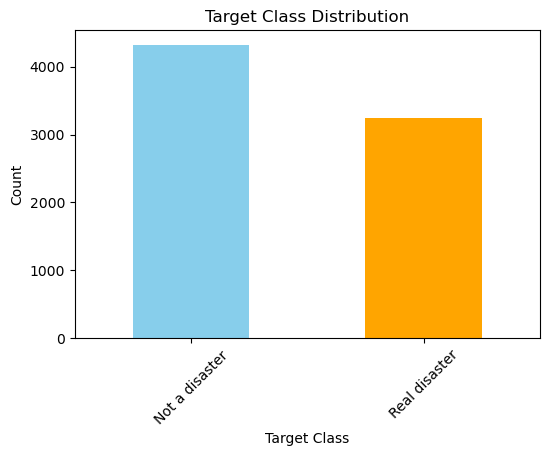

In [22]:
# Plotting the target class distribution
plt.figure(figsize=(6, 4))
train_data['target'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not a disaster', 'Real disaster'], rotation=45)
plt.title('Target Class Distribution')
plt.show()

### 4.2. Word Frequency Analysis  

In [23]:
# Import the necessary modules
from collections import Counter
from wordcloud import WordCloud

In [24]:
# Concatenate all the texts into a single string
all_texts = ' '.join(train_data['text'])

In [25]:
# Tokenize the text into words
words = all_texts.split()

In [26]:
# Count word frequencies
word_freq = Counter(words)

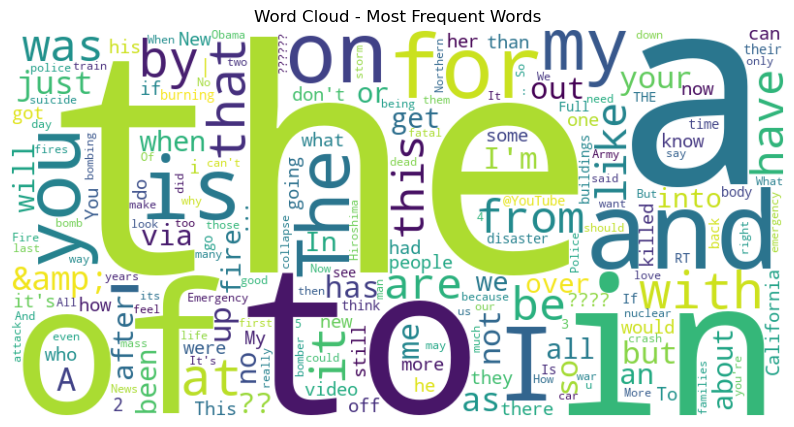

In [27]:
# Plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words')
plt.show()

### 4.3. Text Length Analysis  

In [28]:
# Calculate the length of each tweet
train_data['tweet_length'] = train_data['text'].apply(lambda x: len(x.split()))

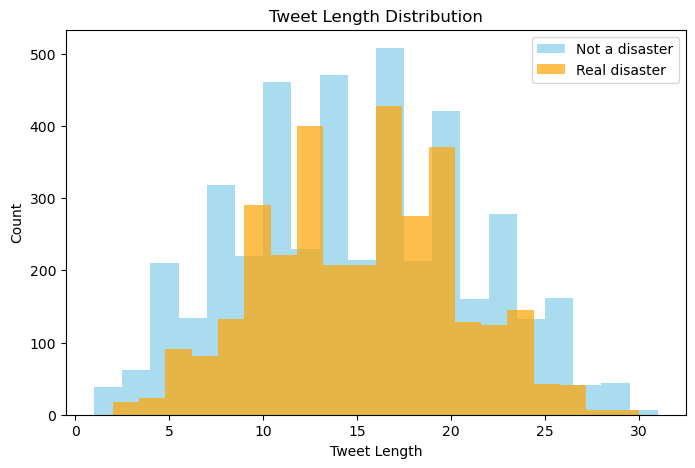

In [29]:
# Plot the tweet length distribution
plt.figure(figsize=(8, 5))
plt.hist(train_data[train_data['target'] == 0]['tweet_length'], bins=20, alpha=0.7, label='Not a disaster', color='skyblue')
plt.hist(train_data[train_data['target'] == 1]['tweet_length'], bins=20, alpha=0.7, label='Real disaster', color='orange')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.legend()
plt.title('Tweet Length Distribution')
plt.show()

### 4.4. Common N-grams  

In [30]:
# Import the necessary modules
from nltk.util import ngrams

In [31]:
# Function to generate n-grams
def generate_ngrams(text, n):
    words = text.split()
    return list(ngrams(words, n))

In [32]:
# Generate and count 2-grams (bigrams) in disaster and non-disaster tweets
disaster_bigrams = generate_ngrams(' '.join(train_data[train_data['target'] == 1]['text']), 2)
non_disaster_bigrams = generate_ngrams(' '.join(train_data[train_data['target'] == 0]['text']), 2)

In [33]:
# Count and display the most common bigrams
print("Top 10 disaster bigrams:", Counter(disaster_bigrams).most_common(10))
print("Top 10 non-disaster bigrams:", Counter(non_disaster_bigrams).most_common(10))

Top 10 disaster bigrams: [(('in', 'the'), 127), (('of', 'the'), 109), (('in', 'a'), 45), (('on', 'the'), 44), (('have', 'been'), 42), (('at', 'the'), 40), (('by', 'the'), 37), (('Northern', 'California'), 36), (('killed', 'in'), 34), (('to', 'the'), 34)]
Top 10 non-disaster bigrams: [(('in', 'the'), 135), (('of', 'the'), 116), (('to', 'the'), 77), (('to', 'be'), 70), (('on', 'the'), 68), (('for', 'the'), 61), (('-', 'Full'), 60), (('in', 'a'), 57), (('like', 'a'), 52), (('I', 'just'), 47)]


## 5. Bag of Words

In [34]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# Create a Bag of Words representation
vectorizer = CountVectorizer()  # The default parameters can be customized (e.g., max_features, ngram_range, etc.)
bow_matrix = vectorizer.fit_transform(train_data['text'])

In [36]:
# Convert the sparse matrix to a DataFrame (optional)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [37]:
# Add the 'target' column back to the DataFrame (optional)
bow_df['target'] = train_data['target']

In [38]:
# printing the bow_df
print(bow_df)

      00  000  0000  007npen6lg  00cy9vxeff  00end  00pm  01  02  0215  ...  \
0      0    0     0           0           0      0     0   0   0     0  ...   
1      0    0     0           0           0      0     0   0   0     0  ...   
2      0    0     0           0           0      0     0   0   0     0  ...   
3      0    1     0           0           0      0     0   0   0     0  ...   
4      0    0     0           0           0      0     0   0   0     0  ...   
...   ..  ...   ...         ...         ...    ...   ...  ..  ..   ...  ...   
7556   0    0     0           0           0      0     0   0   0     0  ...   
7557   0    0     0           0           0      0     0   0   0     0  ...   
7558   0    0     0           0           0      0     0   1   0     0  ...   
7559   0    0     0           0           0      0     0   0   0     0  ...   
7560   0    0     0           0           0      0     0   0   0     0  ...   

      ûò  ûò800000  ûòthe  ûòåêcnbc  ûó  ûóher  ûók

## 6. TF IDF

In [39]:
# Import the necessary modules
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# Create a TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()  # The default parameters can be customized (e.g., max_features, ngram_range, etc.)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['text'])

In [41]:
# Convert the sparse matrix to a DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [42]:
# Add the 'target' column back to the DataFrame (optional)
tfidf_df['target'] = train_data['target']

In [43]:
# printing the tfidf dataframe
print(tfidf_df)

       00       000  0000  007npen6lg  00cy9vxeff  00end  00pm        01   02  \
0     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
1     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
2     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
3     0.0  0.417438   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
4     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
...   ...       ...   ...         ...         ...    ...   ...       ...  ...   
7556  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7557  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7558  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.305254  0.0   
7559  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7560  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   

      0215  ...   ûò  ûò800

## 7. Cross-validation 

In [44]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC  # Replace with the model of your choice

In [45]:
# Split the data into features (X) and target (y)
X = train_data['text']
y = train_data['target']

In [46]:
# Create a pipeline with a feature extractor (TF-IDF) and a classifier (SVM)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC())  # Replace with the model of your choice
])

In [47]:
# Perform cross-validation with k-fold (e.g., k=5)
k = 5
cv_scores = cross_val_score(pipeline, X, y, cv=k, scoring='accuracy')

In [48]:
# Print the cross-validation scores and the mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.74223397 0.6957672  0.7255291  0.72685185 0.79298942]
Mean Accuracy: 0.7366743076756296


## 8. Training, Evaluation and Prediction 

### 8.1 Feature Engineering

In [49]:
# Import the necessary modules
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
# Create TF-IDF vectorizer to convert text to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['text'])

# Prepare the target variable
y_train = train_data['target']

### 8.2 Model Selection and Training

In [51]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [52]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Validation Accuracy:", accuracy)
print("Validation F1 Score:", f1)

Validation Accuracy: 0.799074686054197
Validation F1 Score: 0.733800350262697


### 8.3 Model Evaluation and Selection

In [53]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [54]:
# List of candidate models
models = [
    LogisticRegression(random_state=42),
    MultinomialNB(),
    SVC(kernel='linear', random_state=42)
]

In [55]:
# Dictionary to store the evaluation scores for each model
model_scores = {}

In [56]:
# Perform cross-validation on each model
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    model_scores[type(model).__name__] = scores.mean()

In [57]:
# Print the evaluation scores for each model
for model_name, score in model_scores.items():
    print(f"{model_name}: Mean F1 Score - {score:.4f}")

LogisticRegression: Mean F1 Score - 0.7510
MultinomialNB: Mean F1 Score - 0.7431
SVC: Mean F1 Score - 0.7495


In [58]:
# Select the model with the best mean F1 score
best_model_name = max(model_scores, key=model_scores.get)
best_model = [model for model in models if type(model).__name__ == best_model_name][0]
print(f"Best Model: {best_model_name}")

Best Model: LogisticRegression


### 8.4 Hyperparameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['target'], test_size=0.2, random_state=42)

In [61]:
# Create TF-IDF vectorizer and transform the text data to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

In [62]:
# Selected model: Logistic Regression
model = LogisticRegression(random_state=42)

In [63]:
# Hyperparameter grid to search
param_grid = {
    'C': [0.1, 1.0, 10.0],                # Regularization parameter (smaller values for stronger regularization)
    'solver': ['liblinear', 'lbfgs'],     # Optimization algorithm
    'max_iter': [100, 200, 500],          # Maximum number of iterations
}

In [64]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0], 'max_iter': [100, 200, 500],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [65]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1.0, 'max_iter': 100, 'solver': 'liblinear'}


In [66]:
# Train the model with the best hyperparameters on the full training dataset
best_model = LogisticRegression(random_state=42, **best_params)
best_model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [67]:
# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

In [68]:
# printing the best model
print("Validation Accuracy with Best Model:", val_accuracy)
print("Validation F1 Score with Best Model:", val_f1)

Validation Accuracy with Best Model: 0.7911434236615995
Validation F1 Score with Best Model: 0.7271157167530224


### 8.5 Model Testing and Submission

In [69]:
# Transform the test dataset using the same TF-IDF vectorizer used for training data
X_test_tfidf = tfidf_vectorizer.transform(test_data['text'])

In [70]:
# Make predictions on the test dataset using the best model
y_test_pred = best_model.predict(X_test_tfidf)

In [71]:
# Create a submission DataFrame with the 'id' as index
submission = pd.DataFrame({'target': y_test_pred}, index=test_data.index)

In [72]:
# Save the submission to a CSV file
submission.to_csv('submission.csv')

---

# End of Assignment

Student: Loai Siwas